In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid, make_axes_locatable
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
import seaborn as sns

from scipy.stats import spearmanr, rankdata

import pickle

In [21]:
#
# Load data
#
with open("plotc_data.pkl", "rb") as f:
    shuffle_data = pickle.load(f)
    
with open("plot_ab_data.pkl", "rb") as f:
    vis_data = pickle.load(f)
    
with open("plotS3_data.pkl", "rb") as f:
    imp_vals = pickle.load(f)

# Figure 3

{'RATE_high': 'RATE', 'Pixel-corr_high': 'Correlation', 'lm_mimic_high': 'Linear mimic', 'rf_gini_high_withCV': 'RF mimic (with CV)', 'rf_gini_high_noCV': 'RF mimic (no CV)', 'gbm_gini_high_noCV': 'GBM mimic (no CV)', 'gbm_gini_high_withCV': 'GBM mimic (with CV)', 'random': 'Random'}


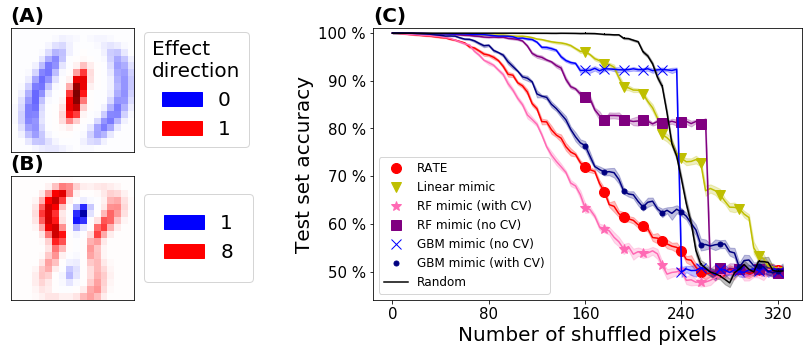

In [22]:
class_set_list = [(0,1), (1,8)]
image_size = int(vis_data["RATE_values"][0].shape[0]**0.5)
p = vis_data["RATE_values"][0].shape[0]

labels = dict(zip([k for k in shuffle_data.keys() if "high" in k],
                  ["RATE", "Correlation", "Linear mimic", "RF mimic (with CV)", "RF mimic (no CV)",
                   "GBM mimic (no CV)", "GBM mimic (with CV)"]))
labels["random"] = "Random"

colours = dict(zip([k for k in shuffle_data.keys() if "high" in k],
                   ["red", "orange", "y", "hotpink", "purple", "blue", "navy"]))
colours["random"] = "black"

print(labels)

# Plot aesthetics
plotsize = 5
tickfontsize = 25
plottitlesize = 40
axislabelfontsize = 20
markersize = 10
legendfontsize = 12

titles = ["(A)", "(B)", "(C)"]

rate_values_signed = [np.sign(vis_data["M_B_signs"][i]) * vis_data["RATE_values"][i] for i in range(2)]

#
# Visualisations
#

# Standardise scales across plots
vmax, vmin = np.amax(rate_values_signed), np.amin(rate_values_signed)
abs_limit = np.amax([vmax, np.abs(vmin)])

#
# Setup axes
#
fig = plt.figure(figsize=(3*plotsize, plotsize))

gs0 = gridspec.GridSpec(1, 2, width_ratios=[1,2])

gs00 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[0])

ax0 = plt.Subplot(fig, gs00[0])
fig.add_subplot(ax0)
ax1 = plt.Subplot(fig, gs00[1])
fig.add_subplot(ax1)

gs01 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[1])

ax2 = plt.Subplot(fig, gs01[:,:])
fig.add_subplot(ax2)

axes = [ax0, ax1, ax2]

for i in range(2):
    ax = axes[i]
    im = ax.imshow(rate_values_signed[i].reshape(image_size, image_size),
                   cmap="seismic", vmin=-abs_limit, vmax=abs_limit)
    
    ax.set_xticks([])
    ax.get_yaxis().set_visible(False)
    
    legend_elements = [Patch(facecolor=c, edgecolor=c, label=l, alpha=1.0) for (c,l) in 
                   zip(["blue", "red"], ["{}".format(class_set_list[i][0]),
                                         "{}".format(class_set_list[i][1])])]
    
    leg_title = "Effect\ndirection" if i==0 else None
    borderpad = plt.rcParams["legend.borderpad"] if i==0 else 1.0
    legend = ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.0, 0.5),
               ncol=1, fancybox=True, title=leg_title, 
                   fontsize=axislabelfontsize, borderpad=borderpad)
    legend.get_title().set_fontsize(axislabelfontsize)
    
#
# Shuffle plots
#
marker_cutoff = 40
marker_size = 10
marker_gap = 4
markers = dict(zip(shuffle_data.keys(), ["o", "1", "v", "*", "s", "x", ".", ",", "2", "3", "4"]))

for k, v in shuffle_data.items():
    if "high" in k or k=="random":
        if "Pixel-corr" in k:
            continue
        mean_line = 100*np.mean(v, axis=1)
        std_line = 100*np.std(v, axis=1)
        if k=="random":
            axes[2].plot(mean_line, c=colours[k], label=labels[k])
            axes[2].fill_between(np.arange(len(v)), mean_line-std_line, mean_line+std_line, alpha=0.25,
                            color=colours[k]) 
            axes[2].plot(np.arange(marker_cutoff, len(v), 1)[::marker_gap], mean_line[marker_cutoff::marker_gap],
                     markers[k],
                   c=colours[k],
                   markersize=markersize)
        else:
            axes[2].plot(mean_line, c=colours[k])
            axes[2].fill_between(np.arange(len(v)), mean_line-std_line, mean_line+std_line, alpha=0.25,
                            color=colours[k]) 
            axes[2].plot(np.arange(marker_cutoff, len(v), 1)[::marker_gap], mean_line[marker_cutoff::marker_gap],
                     markers[k],
                   c=colours[k],
                   markersize=markersize,
                   label=labels[k])

        axes[2].legend(loc="lower left", fontsize=legendfontsize)

for i in range(3):
    axes[i].set_title(titles[i], loc="left", weight="bold", fontsize=axislabelfontsize)

# Format axes
axes[2].set_xticks(np.arange(axes[2].get_xlim()[1])[::20])
axes[2].set_xticklabels(np.arange(0, p+1, 4)[::20])
axes[2].set_yticklabels(["{} %".format(val) for val in np.arange(40, 101, 10)])
axes[2].tick_params("both", labelsize=15)
axes[2].set_ylabel("Test set accuracy", fontsize=axislabelfontsize)
axes[2].set_xlabel("Number of shuffled pixels", fontsize=axislabelfontsize)
axes[2].set_ylim([axes[2].get_ylim()[0], 101])

gs0.update(wspace=0.6) # Separation between the two plots

# Figure S3

/home/jsi17/anaconda3/envs/rate-bnn/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


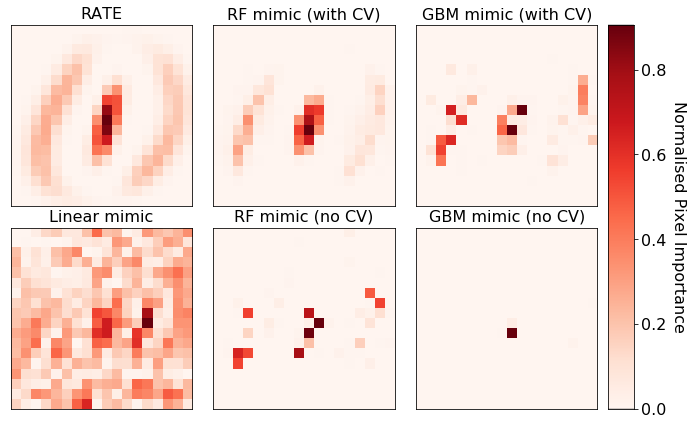

In [23]:
plotsize = 3
image_size = int(324**0.5)

labels = dict(zip([k for k in shuffle_data.keys() if "high" in k],
                  ["RATE", "Correlation", "Linear mimic", "RF mimic (with CV)", "RF mimic (no CV)",
                   "GBM mimic (no CV)", "GBM mimic (with CV)"]))
labels["random"] = "Random"

# Set up figure and image grid
fig = plt.figure(figsize=(3*plotsize, 2*plotsize))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=0.3,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15)


for ax, k in zip(grid, ["RATE_high", "rf_gini_high_withCV", "gbm_gini_high_withCV",
                       "lm_mimic_high", "rf_gini_high_noCV", "gbm_gini_high_noCV"]):
    plot_image = imp_vals[k]
    plot_image /= plot_image.sum()
    im = ax.imshow(plot_image.reshape(image_size, image_size), cmap="Reds")
    ax.set_title(labels[k], fontsize=16)
    ax.set_xticks([])
    ax.get_yaxis().set_visible(False)

cb = ax.cax.colorbar(im)
cb.ax.tick_params(labelsize=16)
cb.ax.set_ylabel("Normalised Pixel Importance", fontsize=16, rotation=270, labelpad=20)

plt.tight_layout()